# Decision Tree Classifier 🌳🌳
## Importing libraries and dataset

0. Import usual libraries

In [48]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
)
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(
    "ignore", category=DeprecationWarning
)  # to avoid deprecation warnings

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

1. Import the bl.txt dataset and display the first few lines.

In [3]:
dataset = pd.read_csv("/Users/qxzjy/vscworkspace/dsfs-ft-34/ml_module/exercices/data/bl.csv")

In [4]:
dataset.head()

,balance,left_weight,left_distance,right_weight,right_distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


2. Display a descriptive statistic table

In [5]:
dataset.describe(include="all")

,balance,left_weight,left_distance,right_weight,right_distance
count,625,625.000000,625.000000,625.000000,625.000000
unique,3,NaN,NaN,NaN,NaN
top,R,NaN,NaN,NaN,NaN
freq,288,NaN,NaN,NaN,NaN
mean,NaN,3.000000,3.000000,3.000000,3.000000
std,NaN,1.415346,1.415346,1.415346,1.415346
min,NaN,1.000000,1.000000,1.000000,1.000000
25%,NaN,2.000000,2.000000,2.000000,2.000000
50%,NaN,3.000000,3.000000,3.000000,3.000000
75%,NaN,4.000000,4.000000,4.000000,4.000000


In [6]:
dataset["balance"].value_counts()

balance
R    288
L    288
B     49
Name: count, dtype: int64

3. What is the dataset shape?

In [7]:
dataset.shape

(625, 5)

## Preprocessing

4. Separate the target variable "balance" into a Y object and the explanatory variables into a X object.

In [8]:
target = "balance"

X = dataset.drop(target, axis=1)
y = dataset[target]

print(X.head())
print(y.head())

   left_weight  left_distance  right_weight  right_distance
0            1              1             1               1
1            1              1             1               2
2            1              1             1               3
3            1              1             1               4
4            1              1             1               5
0    B
1    R
2    R
3    R
4    R
Name: balance, dtype: object


5. Split the data between a train set with 70% of the data and use the rest to build a test set with random_state=42

In [9]:
X_train, X_test, y_train_unproc, y_test_unproc = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## Comparing Decision Trees: Gini or Entropy Criterion?

6. Create an instance of a 'DecisionTreeClassifier' with GINI criterion, and fit it on training data. Beforehand, make any preprocessing that you think is necessary.

In [10]:
label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train_unproc)
y_test = label_encoder.transform(y_test_unproc)

In [11]:
dtc_gini = DecisionTreeClassifier(criterion="gini")
dtc_gini.fit(X_train, y_train)

DecisionTreeClassifier()

7. Display your tree using `plot_tree` from [sklearn.tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html)

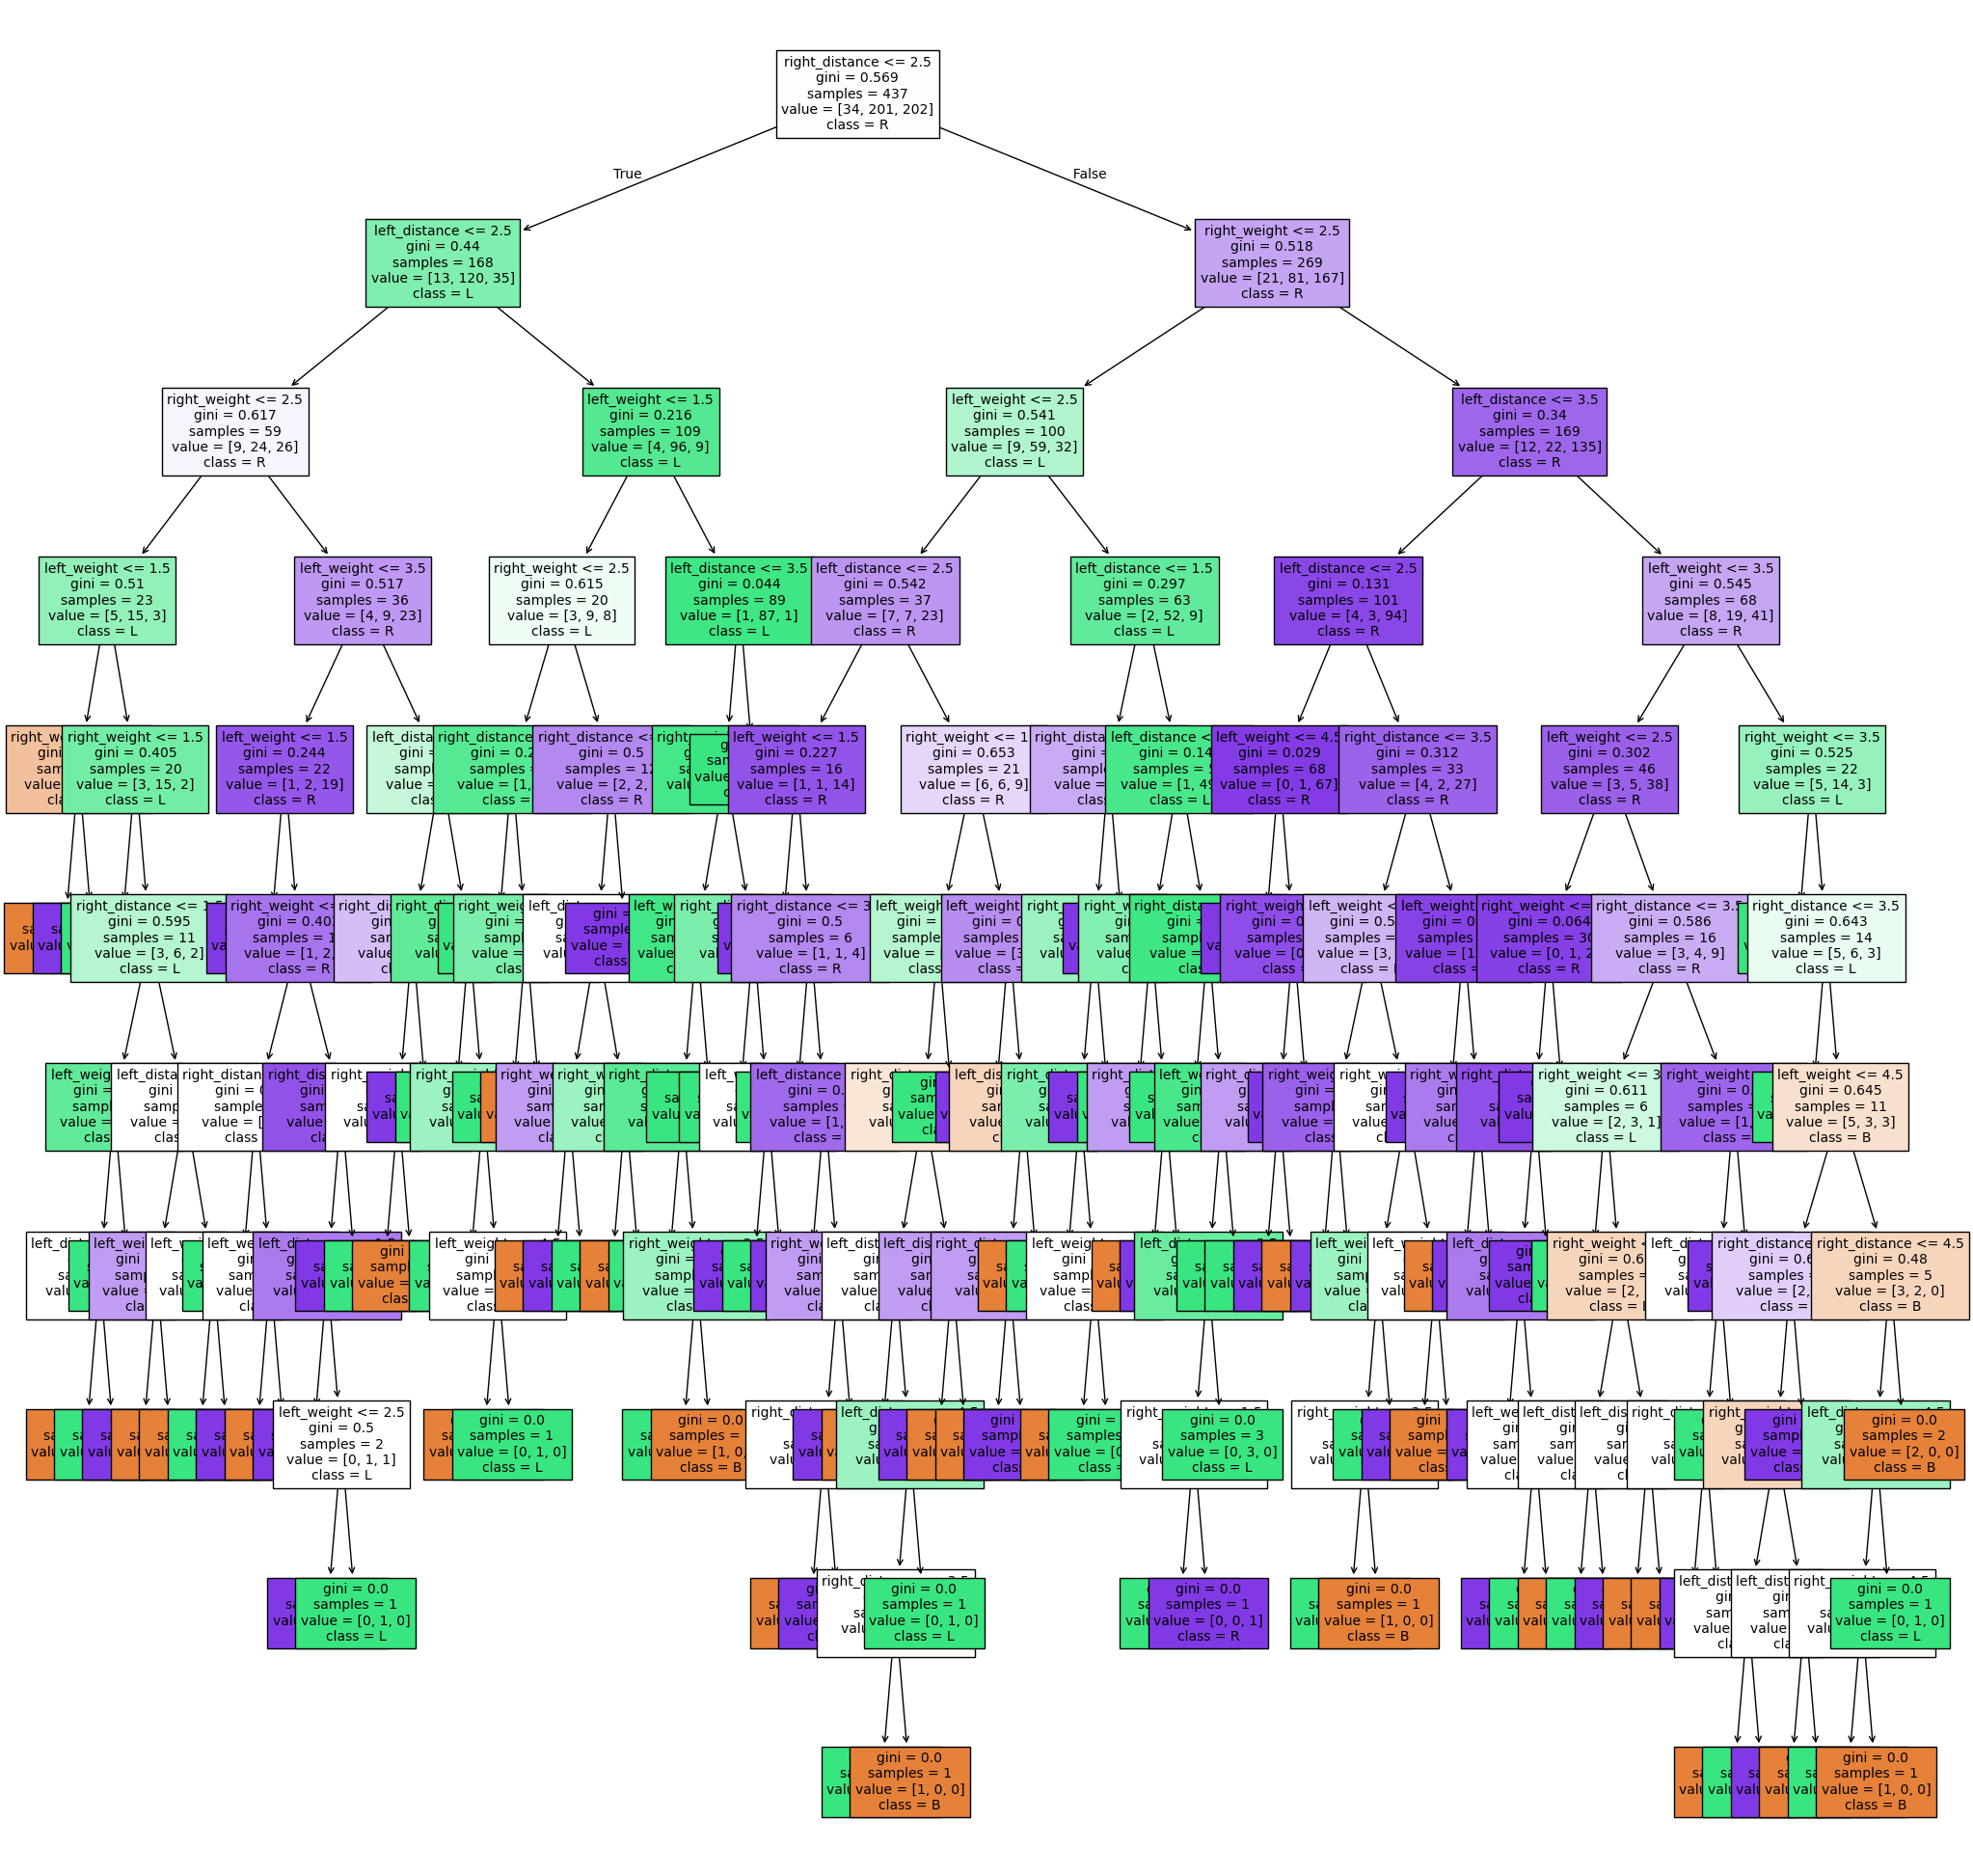

In [12]:
fig = plt.figure(figsize=(25,25))
_ = plot_tree(dtc_gini,
            feature_names=X.columns,
            class_names=label_encoder.inverse_transform([0, 1, 2]),
            filled=True,
            fontsize=10)

8. Create an instance of a DecisionTreeClassifier using the entropy criterion.

In [13]:
dtc_entropy = DecisionTreeClassifier(criterion="entropy")
dtc_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

9. Display the tree

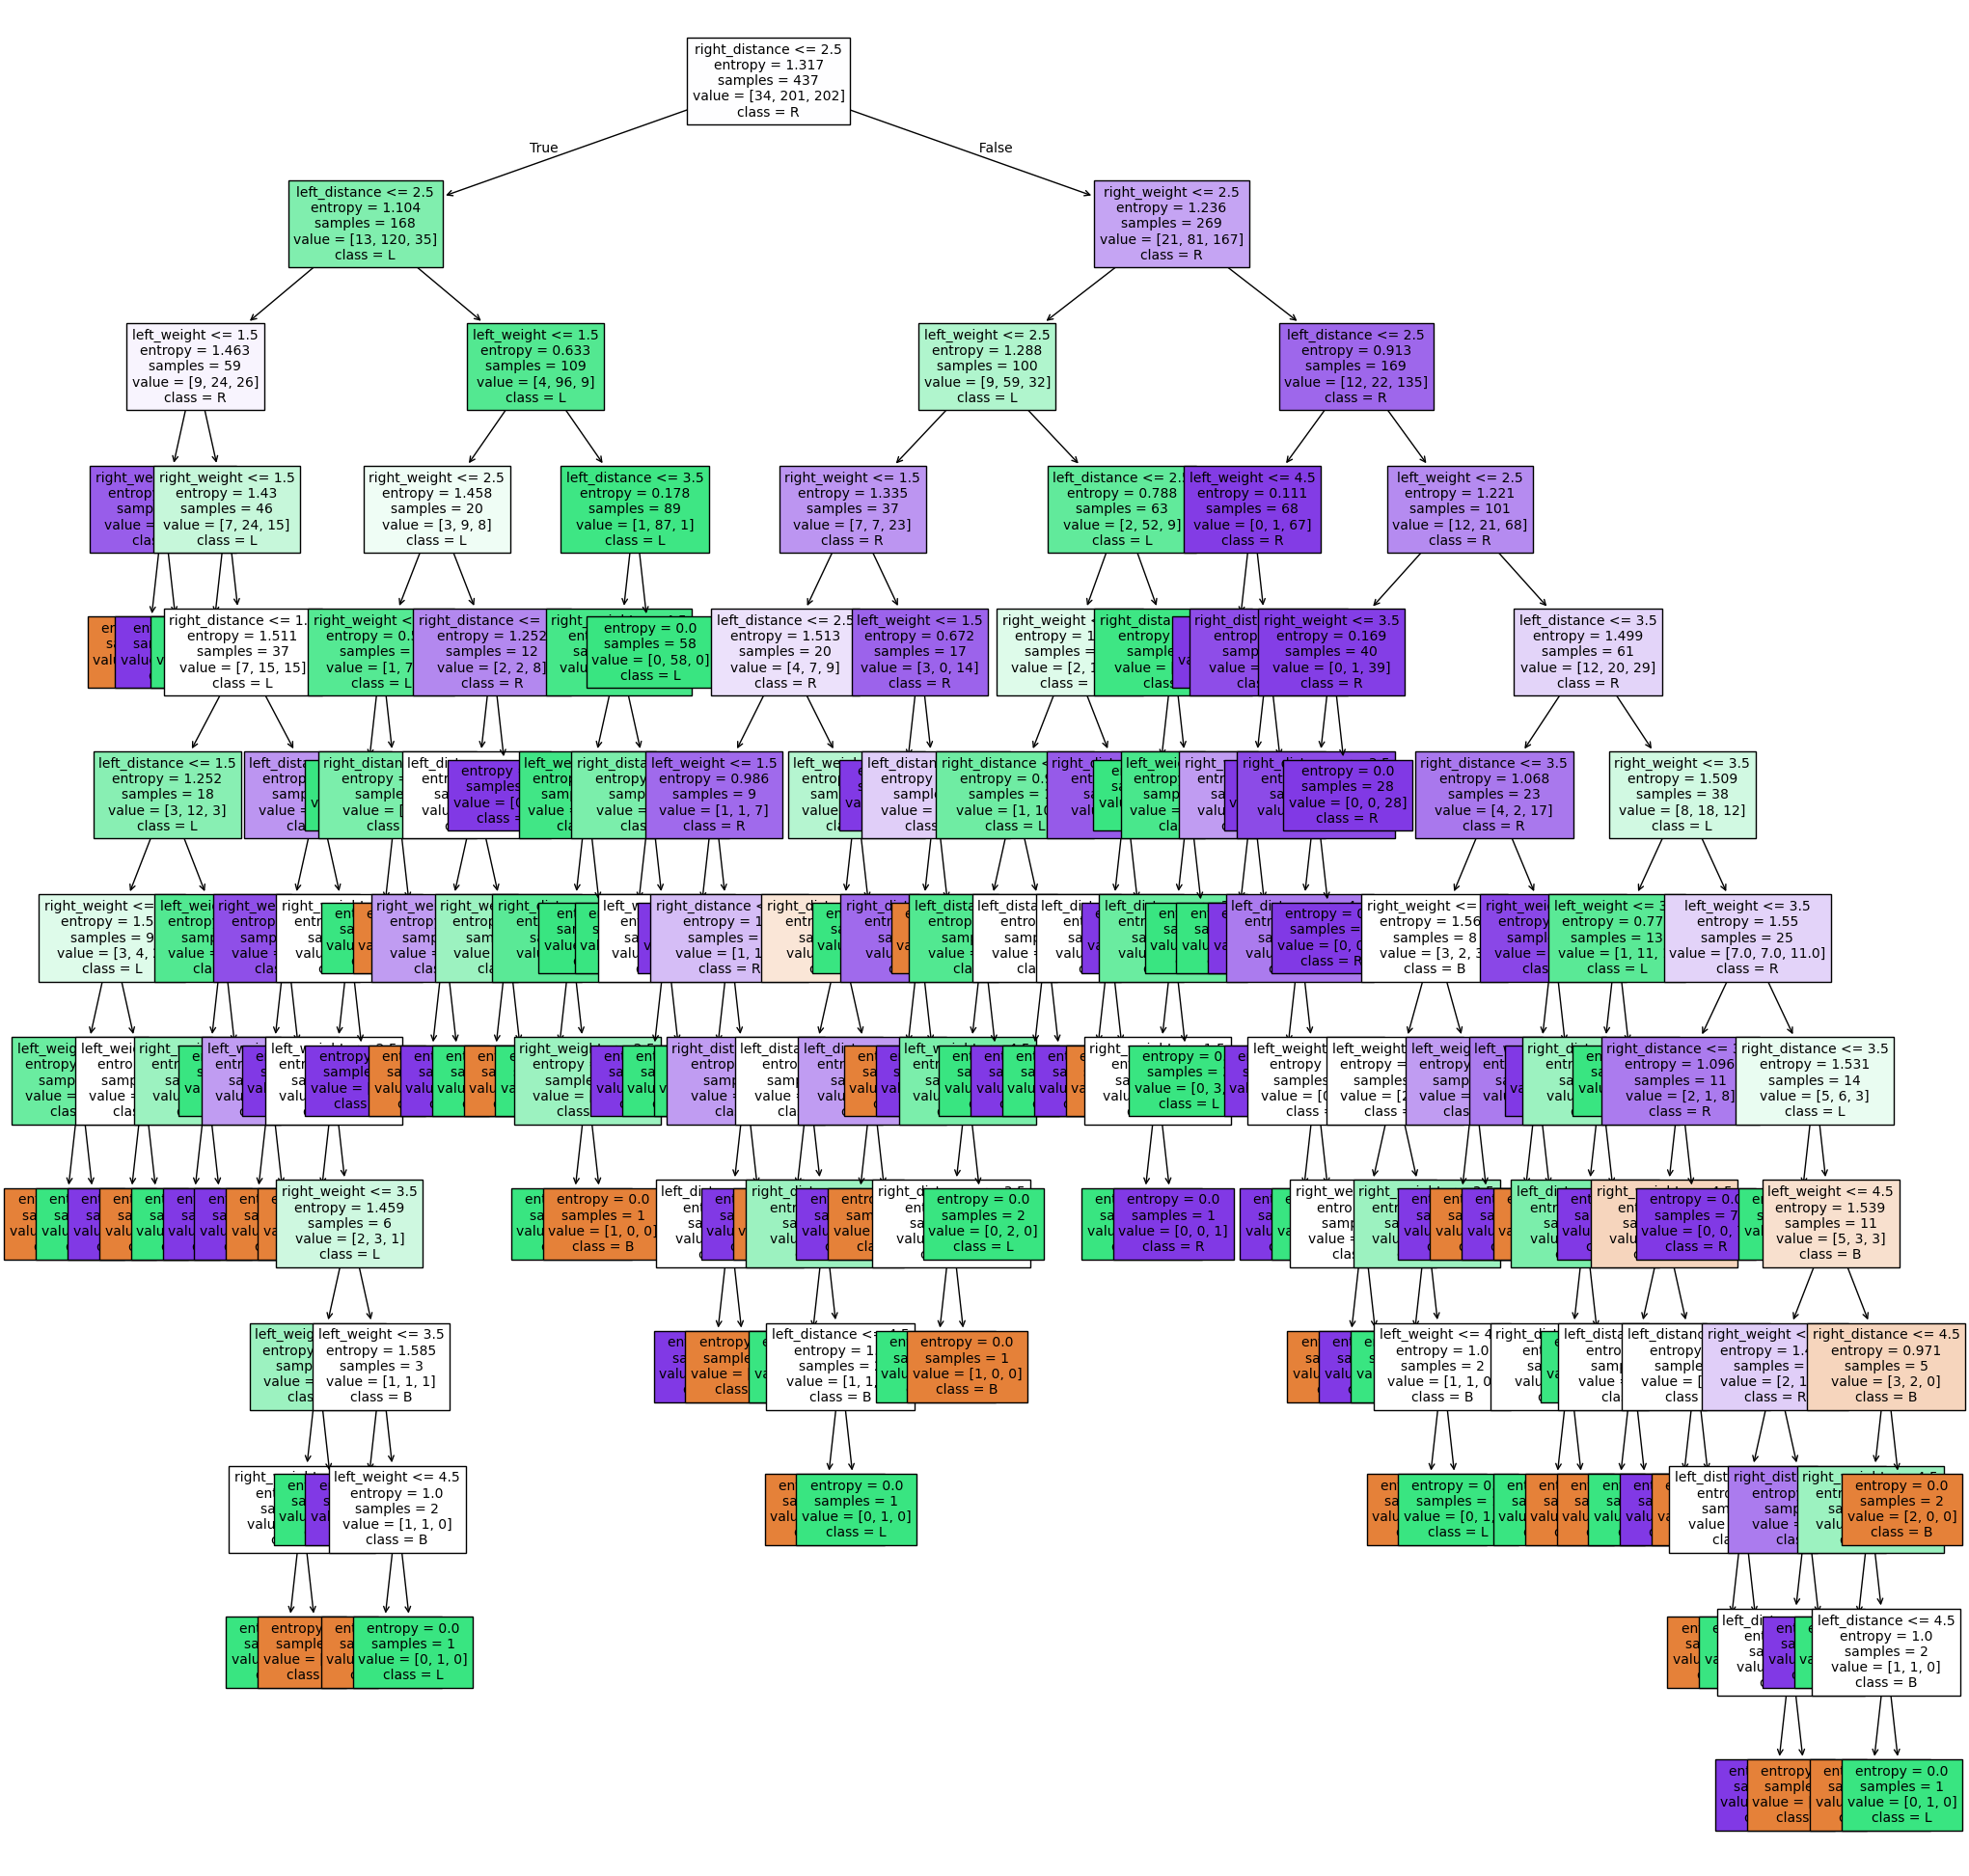

In [14]:
fig = plt.figure(figsize=(25,25))
_ = plot_tree(dtc_entropy,
            feature_names=X.columns,
            class_names=label_encoder.inverse_transform([0, 1, 2]),
            filled=True,
            fontsize=10)

10. Check if the observation defined as X_new  [4, 4, 3, 3] is classified as left

In [18]:
X_new = pd.DataFrame(data = [[4,4,3,3]], columns = ["left_weight", "left_distance", "right_weight", "right_distance"])


In [23]:
x_new_gini = dtc_gini.predict(X_new)
print(f"DTC with criterion Gini prediction : {label_encoder.inverse_transform(x_new_gini)}")

DTC with criterion Gini prediction : ['L']


In [24]:
x_new_entropy = dtc_entropy.predict(X_new)
print(f"DTC with criterion Entropy prediction : {label_encoder.inverse_transform(x_new_entropy)}")

DTC with criterion Entropy prediction : ['L']


11. Use the gini classifier to make predictions on the test set

In [29]:
y_pred_gini = dtc_gini.predict(X_test)

12. Use the entropy classifier on the test set to make predictions

In [25]:
y_pred_entropy = dtc_entropy.predict(X_test)

13. Compare each prediction made with the gini and entropy classifier, what proportion of predictions are identical?

You can either compare each prediction using a for loop over all observations' indices, otherwise you simply loop over the two prediction vectors using the ```zip``` function
You can figure out what ```zip``` does by running
```
A=[1,2,3]
B=["a","b","c"]

for a, b in zip(A,B):
  print(a,b)
```

The numbers appearing in the solution will not necessarily the ones you will obtain depending on random operations you ran on your data.

In [31]:
delta_pred = 0

for gin, ent in zip(y_pred_gini, y_pred_entropy) :

    if ent != gin :
        delta_pred += 1

delta_pred_pourcentage = delta_pred/len(y_pred_gini)*100

print(f"A total of {delta_pred} different predictions, which represent {delta_pred_pourcentage}%")

A total of 18 different predictions, which represent 9.574468085106384%


14. What's the accuracy of the gini classifier?

In [33]:
dtc_gini.score(X_test, y_test)

0.7393617021276596

15. What's the accuracy of the entropy classifier? 

In [34]:
dtc_entropy.score(X_test, y_test)

0.7553191489361702

16. Display the "entropy" model's confusion matrix, what do you notice?

In [47]:
for i, l in enumerate(label_encoder.classes_) :
    print(i, l)

0 B
1 L
2 R


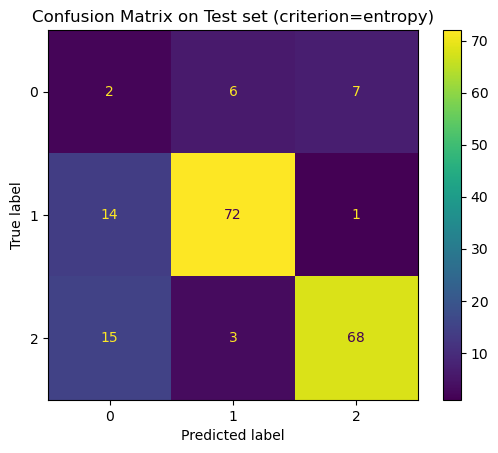

In [36]:
_, ax = plt.subplots()
ax.set(
    title="Confusion Matrix on Test set (criterion=entropy)"
)
ConfusionMatrixDisplay.from_estimator(
    dtc_entropy, X_test, y_test, ax=ax
)
plt.show()

**--> Most errors correspond to examples of class 'B' that are misclassified as 'R' or 'L'**

17. Display the classification report for both models on both training and testing data. Do the models perform well? Do they overfit ?

*Hint : have a look at scikit-learn's documentation about available metric functions* 😉

In [49]:
y_pred_gini_train = dtc_gini.predict(X_train)
y_pred_gini_test = dtc_gini.predict(X_test)

y_pred_entropy_train = dtc_entropy.predict(X_train)
y_pred_entropy_test = dtc_entropy.predict(X_test)


In [58]:
print("Train Gini :")
print(classification_report(y_true=y_train, y_pred=y_pred_gini_train))
print("Test Gini :")
print(classification_report(y_true=y_test, y_pred=y_pred_gini_test))

Train Gini :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00       201
           2       1.00      1.00      1.00       202

    accuracy                           1.00       437
   macro avg       1.00      1.00      1.00       437
weighted avg       1.00      1.00      1.00       437

Test Gini :
              precision    recall  f1-score   support

           0       0.04      0.07      0.05        15
           1       0.83      0.84      0.83        87
           2       0.89      0.76      0.82        86

    accuracy                           0.74       188
   macro avg       0.59      0.55      0.57       188
weighted avg       0.79      0.74      0.76       188



In [59]:
print("Train Entropy :")
print(classification_report(y_true=y_train, y_pred=y_pred_entropy_train))
print("Test Entropy :")
print(classification_report(y_true=y_test, y_pred=y_pred_entropy_test))

Train Entropy :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00       201
           2       1.00      1.00      1.00       202

    accuracy                           1.00       437
   macro avg       1.00      1.00      1.00       437
weighted avg       1.00      1.00      1.00       437

Test Entropy :
              precision    recall  f1-score   support

           0       0.06      0.13      0.09        15
           1       0.89      0.83      0.86        87
           2       0.89      0.79      0.84        86

    accuracy                           0.76       188
   macro avg       0.62      0.58      0.59       188
weighted avg       0.83      0.76      0.79       188



## Fighting overfitting

18. How would you fight overfitting while still using decision tree classifiers? Try to find the set of hyper parameters that maximize the performances of the model on the test set. Did the model perform better ? Are there still ways to improve the model?

In [60]:
dtc_gini_hyper = DecisionTreeClassifier()
params = {
    'max_depth' : [i for i in range(1, 10, 1)],
    'min_samples_split' : [2, 5, 10, 20]
}

gridsearch_gini =  GridSearchCV(estimator=dtc_gini_hyper, param_grid= params, cv = 10)
gridsearch_gini.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 5, 10, 20]})

In [64]:
print("Train Gini :")
print(classification_report(y_true=y_train, y_pred=gridsearch_gini.predict(X_train)))
print("Test Gini :")
print(classification_report(y_true=y_test, y_pred=gridsearch_gini.predict(X_test)))

Train Gini :
              precision    recall  f1-score   support

           0       0.67      0.06      0.11        34
           1       0.87      0.89      0.88       201
           2       0.82      0.93      0.87       202

    accuracy                           0.84       437
   macro avg       0.79      0.63      0.62       437
weighted avg       0.83      0.84      0.82       437

Test Gini :
              precision    recall  f1-score   support

           0       0.20      0.07      0.10        15
           1       0.80      0.83      0.81        87
           2       0.77      0.84      0.80        86

    accuracy                           0.77       188
   macro avg       0.59      0.58      0.57       188
weighted avg       0.74      0.77      0.75       188



Resultats aren't improving much, but the overfit has been reduced.

## Feature engineering

19. Try and create new variables in order to improve the model's performance. Make again the preprocessings. And train a new model with gini criterion.

In [65]:
dataset['left_prod'] = dataset['left_weight'] * dataset['left_distance']
dataset['right_prod'] = dataset['right_weight'] * dataset['right_distance']
dataset['balanced'] = dataset['right_prod'] - dataset['left_prod']

In [66]:
target_variable = "balance"

X = dataset.drop(target_variable, axis = 1)
y = dataset.loc[:,target_variable]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify = y)

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


In [71]:
classifier_gini = DecisionTreeClassifier(criterion="gini")
classifier_gini.fit(X_train, y_train)

DecisionTreeClassifier()

In [73]:
print(classification_report(y_train, classifier_gini.predict(X_train)))
print(classification_report(y_test, classifier_gini.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00       201
           2       1.00      1.00      1.00       202

    accuracy                           1.00       437
   macro avg       1.00      1.00      1.00       437
weighted avg       1.00      1.00      1.00       437

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        87
           2       1.00      1.00      1.00        86

    accuracy                           1.00       188
   macro avg       1.00      1.00      1.00       188
weighted avg       1.00      1.00      1.00       188

